# Source:

Creator and Maintainer:

Kenta Nakai
Institue of Molecular and Cellular Biology
Osaka, University
1-3 Yamada-oka, Suita 565 Japan
nakai '@' imcb.osaka-u.ac.jp
http://www.imcb.osaka-u.ac.jp/nakai/psort.html

Donor:

Paul Horton (paulh '@' cs.berkeley.edu)


# Data Set Information:

Predicted Attribute: Localization site of protein. ( non-numeric ).

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset.

Reference: "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", Kenta Nakai & Minoru Kanehisa, PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

Reference: "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Kenta Nakai & Minoru Kanehisa, Genomics 14:897-911, 1992.


# Attribute Information:

1. Sequence Name: Accession number for the SWISS-PROT database
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. alm: Score of the ALOM membrane spanning region prediction program.
5. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
6. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
7. pox: Peroxisomal targeting signal in the C-terminus.
8. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
9. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.


# Relevant Papers:

Paul Horton & Kenta Nakai, "A Probablistic Classification System for Predicting the Cellular Localization Sites of Proteins", Intelligent Systems in Molecular Biology, 109-115. St. Louis, USA 1996.
[Web Link]

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset:

Kenta Nakai & Minoru Kanehisa, "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

Kenta Nakai & Minoru Kanehisa, "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Genomics 14:897-911, 1992.
[Web Link]




In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Understanding Data

In [61]:
df = pd.read_csv('yeast.data', delim_whitespace=True)
df.head(10)

Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
5    AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22   CYT
6    ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.0  0.53  0.22   MIT
7    BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34   NUC
8    ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.0  0.49  0.22   MIT
9    ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.0  0.58  0.30   CYT

In [62]:
names = list(df.columns)
names

['Sequence_Name',
 'mcg',
 'gvh',
 'alm',
 'mit',
 'erl',
 'pox',
 'vac',
 'nuc',
 'class']

In [63]:
df.describe().T

count      mean       std   min   25%   50%   75%   max
mcg  1484.0  0.500121  0.137299  0.11  0.41  0.49  0.58  1.00
gvh  1484.0  0.499933  0.123924  0.13  0.42  0.49  0.57  1.00
alm  1484.0  0.500034  0.086670  0.21  0.46  0.51  0.55  1.00
mit  1484.0  0.261186  0.137098  0.00  0.17  0.22  0.32  1.00
erl  1484.0  0.504717  0.048351  0.50  0.50  0.50  0.50  1.00
pox  1484.0  0.007500  0.075683  0.00  0.00  0.00  0.00  0.83
vac  1484.0  0.499885  0.057797  0.00  0.48  0.51  0.53  0.73
nuc  1484.0  0.276199  0.106491  0.00  0.22  0.22  0.30  1.00

In [64]:
df.isna().sum()

Sequence_Name    0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
class            0
dtype: int64

<AxesSubplot: >

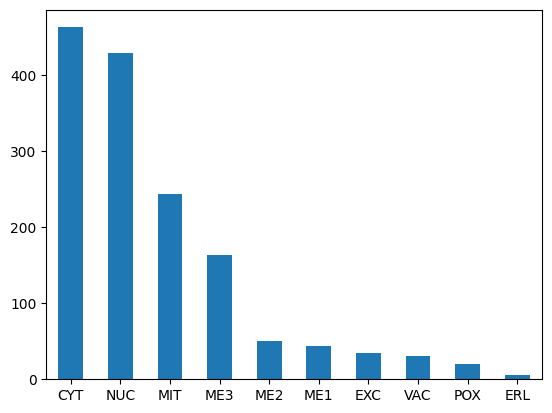

In [65]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [66]:
array = df.values
X = array[:,1:-1] 
Y = array[:,-1]

In [67]:
X,Y

(array([[0.58, 0.61, 0.47, ..., 0.0, 0.48, 0.22],
        [0.43, 0.67, 0.48, ..., 0.0, 0.53, 0.22],
        [0.64, 0.62, 0.49, ..., 0.0, 0.53, 0.22],
        ...,
        [0.67, 0.57, 0.36, ..., 0.0, 0.56, 0.22],
        [0.43, 0.4, 0.6, ..., 0.0, 0.53, 0.39],
        [0.65, 0.54, 0.54, ..., 0.0, 0.53, 0.22]], dtype=object),
 array(['MIT', 'MIT', 'MIT', ..., 'ME2', 'NUC', 'CYT'], dtype=object))

# Normalize Data

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)
x_scaled[0]

array([0.52808989, 0.55172414, 0.32911392, 0.13      , 0.        ,
       0.        , 0.65753425, 0.22      ])

In [69]:
pd.DataFrame(x_scaled, columns=names[1:-1]).head()

mcg       gvh       alm   mit  erl  pox       vac   nuc
0  0.528090  0.551724  0.329114  0.13  0.0  0.0  0.657534  0.22
1  0.359551  0.620690  0.341772  0.27  0.0  0.0  0.726027  0.22
2  0.595506  0.563218  0.354430  0.15  0.0  0.0  0.726027  0.22
3  0.528090  0.356322  0.455696  0.13  0.0  0.0  0.739726  0.22
4  0.348315  0.356322  0.341772  0.54  0.0  0.0  0.657534  0.22

# Building Models

In [70]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [71]:
test_size = 0.1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x_scaled, Y, test_size=test_size, random_state=42)

## KNN n = 5

In [72]:
from sklearn.neighbors import KNeighborsClassifier
KNN_5 = KNeighborsClassifier(n_neighbors=5)
history_KNN_5 = KNN_5.fit(X_train, Y_train)

In [73]:
Y_predict_KNN_5 = KNN_5.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_KNN_5))
rp_knn_5 = (metrics.classification_report(Y_test, Y_predict_KNN_5))
print(rp_knn_5)

[[35  0  1  0  2  2  7  0  0]
 [ 1  1  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0]
 [ 1  0  0  0 17  0  3  0  0]
 [ 9  0  0  0  1 18  0  0  0]
 [20  0  0  0  0  6 13  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 1  1  0  0  0  1  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.51      0.74      0.61        47
         EXC       0.33      0.50      0.40         2
         ME1       0.75      0.75      0.75         4
         ME2       1.00      0.67      0.80         3
         ME3       0.85      0.81      0.83        21
         MIT       0.67      0.64      0.65        28
         NUC       0.54      0.33      0.41        39
         POX       1.00      1.00      1.00         1
         VAC       0.00      0.00      0.00         4

    accuracy                           0.60       149
   macro avg       0.63      0.61      0.61       149
weighted avg       0.60      0.60      0.59       149



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN n = 3

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNN_3 = KNeighborsClassifier(n_neighbors=3)
history_KNN_3 = KNN_3.fit(X_train, Y_train)

In [76]:
Y_predict_KNN_3 = KNN_3.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_KNN_3))
rp_knn_3 = (metrics.classification_report(Y_test, Y_predict_KNN_3))
print(rp_knn_3)

[[29  0  1  0  3  2 12  0  0]
 [ 0  1  0  0  0  1  0  0  0]
 [ 0  1  3  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0]
 [ 3  0  0  0 17  0  1  0  0]
 [ 9  0  0  0  1 16  2  0  0]
 [14  1  0  0  0  5 19  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  2  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.52      0.62      0.56        47
         EXC       0.25      0.50      0.33         2
         ME1       0.75      0.75      0.75         4
         ME2       1.00      0.67      0.80         3
         ME3       0.81      0.81      0.81        21
         MIT       0.62      0.57      0.59        28
         NUC       0.54      0.49      0.51        39
         POX       1.00      1.00      1.00         1
         VAC       0.00      0.00      0.00         4

    accuracy                           0.59       149
   macro avg       0.61      0.60      0.60       149
weighted avg       0.59      0.59      0.58       149



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## weighted KNN n = 5

In [78]:
from sklearn.neighbors import KNeighborsClassifier
weighted_KNN_5 = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
history_weighted_KNN_5 = weighted_KNN_5.fit(X_train, Y_train)

In [79]:
Y_predict_weighted_KNN_5 = KNN_5.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_weighted_KNN_5))
rp_w_knn_5 = (metrics.classification_report(Y_test, Y_predict_weighted_KNN_5))
print(rp_w_knn_5)

[[35  0  1  0  2  2  7  0  0]
 [ 1  1  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0]
 [ 1  0  0  0 17  0  3  0  0]
 [ 9  0  0  0  1 18  0  0  0]
 [20  0  0  0  0  6 13  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 1  1  0  0  0  1  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.51      0.74      0.61        47
         EXC       0.33      0.50      0.40         2
         ME1       0.75      0.75      0.75         4
         ME2       1.00      0.67      0.80         3
         ME3       0.85      0.81      0.83        21
         MIT       0.67      0.64      0.65        28
         NUC       0.54      0.33      0.41        39
         POX       1.00      1.00      1.00         1
         VAC       0.00      0.00      0.00         4

    accuracy                           0.60       149
   macro avg       0.63      0.61      0.61       149
weighted avg       0.60      0.60      0.59       149



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## weighted KNN n = 3

In [81]:
from sklearn.neighbors import KNeighborsClassifier
weighted_KNN_3 = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
history_weighted_KNN_3 = weighted_KNN_3.fit(X_train, Y_train)

In [82]:
Y_predict_weighted_KNN_3 = weighted_KNN_3.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,Y_predict_weighted_KNN_3))
rp_w_knn_3 = (metrics.classification_report(Y_test, Y_predict_weighted_KNN_3))
print(rp_w_knn_3)

[[27  0  1  0  2  3 13  0  1]
 [ 0  1  0  0  0  1  0  0  0]
 [ 0  1  2  0  0  0  0  1  0]
 [ 1  0  0  2  0  0  0  0  0]
 [ 2  0  0  0 17  0  2  0  0]
 [ 6  0  0  0  1 17  4  0  0]
 [12  0  0  0  0  6 21  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  2  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.56      0.57      0.57        47
         EXC       0.33      0.50      0.40         2
         ME1       0.67      0.50      0.57         4
         ME2       1.00      0.67      0.80         3
         ME3       0.85      0.81      0.83        21
         MIT       0.59      0.61      0.60        28
         NUC       0.51      0.54      0.53        39
         POX       0.50      1.00      0.67         1
         VAC       0.00      0.00      0.00         4

    accuracy                           0.59       149
   macro avg       0.56      0.58      0.55       149
weighted avg       0.59      0.59      0.59       149



# Gaussian NB

In [84]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)
print(model)

GaussianNB()


In [85]:
Y_predict_Gau_NB = model.predict(X_test)

print(metrics.confusion_matrix(Y_test, Y_predict_Gau_NB))
rp_gau_NB = (metrics.classification_report(Y_test, Y_predict_Gau_NB))
print(rp_gau_NB)

[[ 0  3  1  0  0  1  3  0 39]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  3  0 18]
 [ 0  6  0  0  0  8  0  0 14]
 [ 0  4  0  0  0  0  7  0 28]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  2  1  0  0  0  0  0  1]]
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00        47
         EXC       0.10      1.00      0.18         2
         ME1       0.20      0.25      0.22         4
         ME2       0.00      0.00      0.00         3
         ME3       0.00      0.00      0.00        21
         MIT       0.89      0.29      0.43        28
         NUC       0.54      0.18      0.27        39
         POX       1.00      1.00      1.00         1
         VAC       0.01      0.25      0.02         4

    accuracy                           0.13       149
   macro avg       0.30      0.33      0.24       149
weighted avg       0.32      0.13      0.17       149



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multinomial NB

In [86]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)
print(model)

MultinomialNB()


In [87]:
Y_predict_Multi_NB = model.predict(X_test)

print(metrics.confusion_matrix(Y_test, Y_predict_Multi_NB))
rp_multi_NB = (metrics.classification_report(Y_test, Y_predict_Multi_NB))
print(rp_multi_NB)

[[45  0  0  0  0  0  2  0  0]
 [ 2  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  1  0  0]
 [28  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 4  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.32      0.96      0.48        47
         EXC       0.00      0.00      0.00         2
         ME1       0.00      0.00      0.00         4
         ME2       0.00      0.00      0.00         3
         ME3       0.00      0.00      0.00        21
         MIT       0.00      0.00      0.00        28
         NUC       0.50      0.08      0.13        39
         POX       1.00      1.00      1.00         1
         VAC       0.00      0.00      0.00         4

    accuracy                           0.33       149
   macro avg       0.20      0.23      0.18       149
weighted avg       0.24      0.33      0.19       149



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plotting and Comparing

In [88]:
# plt.plot(rp_gau_NB['accuracy'])
# rp_gau_NB